<a href="https://colab.research.google.com/github/gondore/nsdc-crafter/blob/main/nsdc_crafter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gymnasium crafter shimmy[gymv21] stable_baselines3

In [ ]:
import gymnasium as gym
import crafter


env = gym.make("GymV26Environment-v0", env_id = 'CrafterReward-v1')  # Or CrafterNoReward-v1
"""env = crafter.Recorder(
  env, './path/to/logdir',
  save_stats=True,
  save_video=False,
  save_episode=False,
)"""
import matplotlib.pyplot as plt
import numpy as np

It looks like our observation space is image data? 64x64x3 (height x width x channel)

In [9]:
print("Observation Space", env.observation_space)
print("Sample observation", env.observation_space.sample())

Observation Space Box(0, 255, (64, 64, 3), uint8)
Sample observation [[[ 86 190 198]
  [ 77  34 240]
  [205 185 160]
  ...
  [205  63  17]
  [248 161 249]
  [  2  29   1]]

 [[189  34  26]
  [ 38 168 178]
  [234 234 205]
  ...
  [ 38  90  46]
  [134 231  77]
  [ 38  40 250]]

 [[ 24  96   3]
  [188  50 121]
  [167 200  47]
  ...
  [149 120 136]
  [196  12 178]
  [252  30 123]]

 ...

 [[ 33 153 213]
  [ 90 100 191]
  [ 21 205 103]
  ...
  [216 120   5]
  [133 107 195]
  [215 168   2]]

 [[ 97  42  64]
  [ 72 240 187]
  [ 68 174 224]
  ...
  [ 26  74 245]
  [ 20 232 242]
  [ 19  63 193]]

 [[124 180  24]
  [ 40  13  73]
  [234 129  14]
  ...
  [248 182 213]
  [ 85  30 101]
  [ 88  69  83]]]


In [10]:
observation_space = env.observation_space

According to crafter documentation, (https://github.com/danijar/crafter/blob/e04542a2159f1aad3d4c5ad52e8185717380ee3a/crafter/env.py#L15)

```
  def observation_space(self):
    return BoxSpace(0, 255, tuple(self._size) + (3,), np.uint8)
```

 I believe the observation space is in the form of BoxSpace, which I'm not familiar with. This plot below is just a quick script that visualizes the observation space. I think we will have to work with image data and flatten it to state representations?


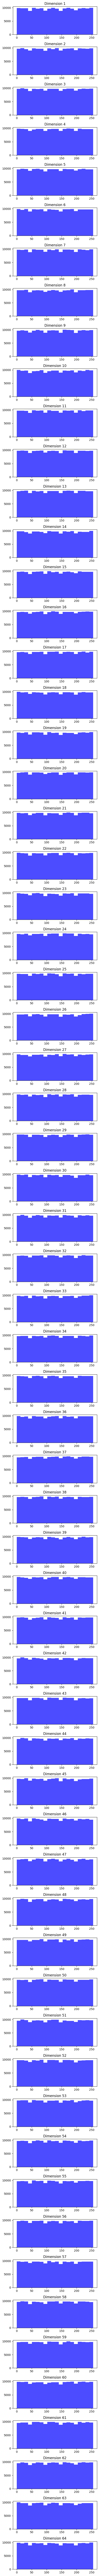

In [11]:
if isinstance(observation_space, gym.spaces.Box):
    dimensions = observation_space.shape[0]

    fig, axs = plt.subplots(dimensions, 1, figsize=(5, 2 * dimensions))

    for i in range(dimensions):
        observations = [env.observation_space.sample() for _ in range(1000)]
        flattened_values = np.array([obs[i] for obs in observations])
        flattened_values = flattened_values.flatten()  # 1D array
        axs[i].hist(flattened_values, bins=20, color='blue', alpha=0.7)
        axs[i].set_title(f'Dimension {i+1}')

    plt.tight_layout()
    plt.show()